In [29]:
import iris
import numpy as np
from netCDF4 import Dataset
import pylab as plt
import pandas as pd
from scipy.stats import lognorm, kstest, normaltest


In [30]:
confer_data = np.loadtxt('confer_snowdepth_salinity.csv', delimiter=',')

In [31]:
# get ist column and second column to snow salinty and snow depth data
confer_sp = confer_data[:,0]

confer_sd = confer_data[:,1]

# Add Mcfarlane et al data 

In [32]:
new_data = pd.read_excel('SnowSalinity_markus/MOSAiC_snowpits_13_salinity_data.xlsx')
salinity_new = new_data[new_data.columns[13]].values

# output names of all headers of pandas dataframe
depth_new = new_data[new_data.columns[6]].values * 100

flag1 = salinity_new != np.nan
flag2 = depth_new != np.nan

flag_new = flag1 & flag2
depth_new = depth_new[flag_new]
salinity_new = salinity_new[flag_new]

#new_flag = (depth_new > 0) & (salinity_new!=0.1)
#depth_new = depth_new[new_flag]
#salinity_new = salinity_new[new_flag] 

flag1 = salinity_new != 0
flag2 = depth_new != np.nan
flag3 = depth_new >0

flag_new = flag1 & flag2 & flag3
depth_new = depth_new[flag_new]
salinity_new = salinity_new[flag_new]




# combine salinity and depth data from confer and new data
all_sd = np.concatenate((confer_sd, depth_new))
all_sp = np.concatenate((confer_sp, salinity_new))

flag_20cm = all_sd < 20
all_sd_20 = all_sd[flag_20cm]
all_sp_20 = all_sp[flag_20cm]



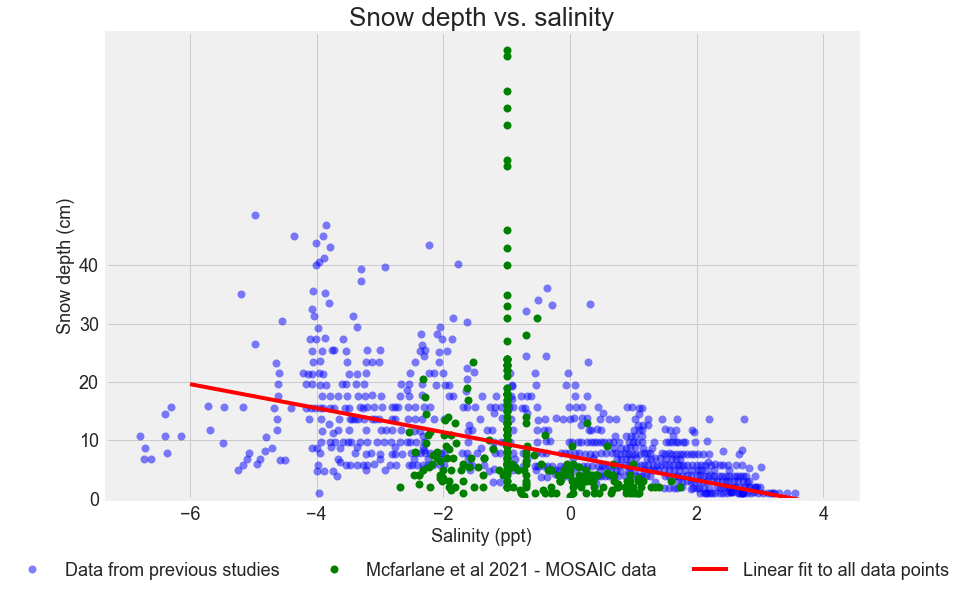

In [33]:
#plt.plot(confer_sp, confer_sd, 'grey','o')
# rewrite the ablve line  with grey dots
plt.figure(figsize = (12, 8))
plt.style.use('fivethirtyeight')
#plt.plot(confer_sp, confer_sd, 'b.', markersize=16, alpha=0.5,label = 'Data from previous studies')
plt.plot(np.log(confer_sp), confer_sd, 'b.', markersize=16, alpha=0.5,label = 'Data from previous studies')
plt.plot(np.log10(salinity_new),depth_new,'g.',markersize = 16, label = 'Mcfarlane et al 2021 - MOSAIC data')

# calculate linear fit to all data points
z = np.polyfit(np.log10(all_sp_20), all_sd_20, 1)
p = np.poly1d(z)

log_sp_fine = np.linspace(-6,4,100)
#plt.plot(np.log10(all_sp),p(np.log10(all_sp)),'r-', label = 'Linear fit to all data points')
plt.plot(log_sp_fine,p(log_sp_fine),'r-', label = 'Linear fit to all data points')


# set x axis to log scale
#plt.xscale('log')
plt.ylim(0, 80)
plt.yticks(np.arange(0, 50, 10), fontsize = 18)
plt.xticks(fontsize = 18)
plt.xlabel('Salinity (ppt)', fontsize = 18)
plt.ylabel('Snow depth (cm)', fontsize = 18)
plt.title('Snow depth vs. salinity', fontsize = 26)
plt.grid(True)
# add legend to the bottom of the plot below the x axis and xlabel 
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5, fontsize = 18)


Text(0.5, 0, 'log(Salinity)')

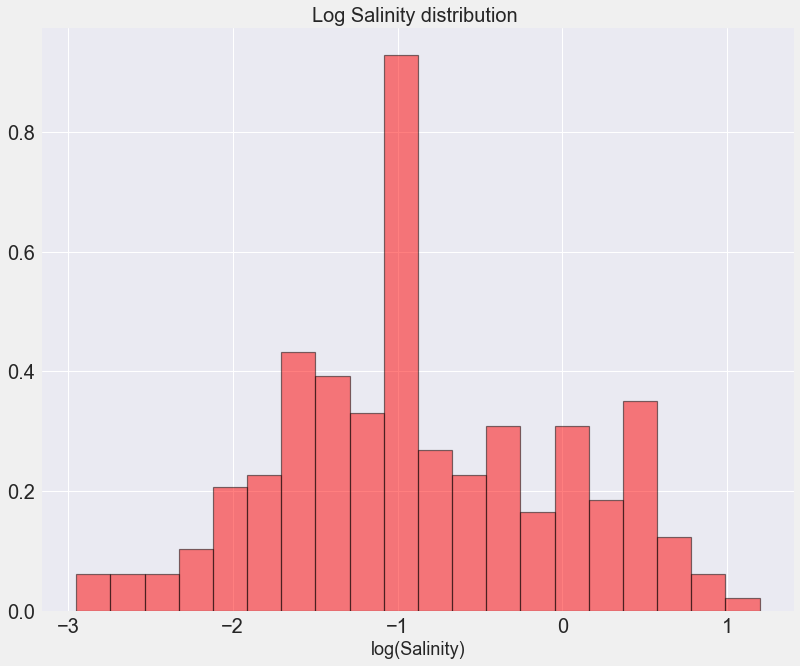

In [34]:
# histogram plot of snowdepth on y axis and salinity on x axis
flag = (all_sd>10) & (all_sd<20)
salinity_2 = all_sp[flag]
plt.figure(figsize=(12,10))
plt.style.use('seaborn')
plt.hist(np.log10(salinity_2),bins = 20, color = 'r', alpha = 0.5, label = 'Data', edgecolor = 'k', linewidth = 1.2, density = True)
#plt.colorbar()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Log Salinity distribution ',fontsize = 20)
plt.xlabel('log(Salinity)',fontsize = 18)
#plt.ylabel('Snow_depth, Z (cm)',fontsize = 18)

# Fit Normal distribution to the data 

Text(0, 0.5, 'Prabability density')

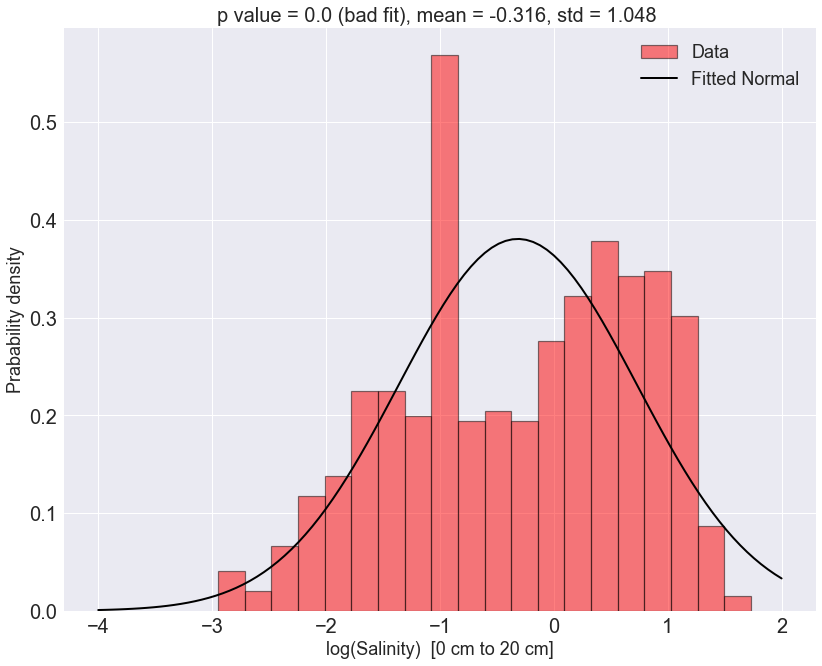

In [38]:
# histogram plot of snowdepth on y axis and salinity on x axis
from scipy.stats import norm

bin1 = 0
bin2 = 100

flag = (all_sd>bin1) & (all_sd<bin2)
salinity_2 = all_sp[flag]
plt.figure(figsize=(12,10))
plt.style.use('seaborn')
plt.hist(np.log10(salinity_2),bins = 20, color = 'r', alpha = 0.5, label = 'Data', edgecolor = 'k', linewidth = 1.2, density = True)

mean, std = norm.fit(np.log10(salinity_2))
x = np.linspace(-4, 2, 100)
pdf_fitted = norm.pdf(x, mean, std)

# estimate the p value using the Kolmogorov-Smirnov test
p_value = kstest(np.log10(salinity_2), 'norm', args=(mean, std))[1]
p_value = np.round(p_value, 3)
flag = ''
if p_value > 0.05:
    flag2 = 'good fit'
else:
    flag2 = 'bad fit'


plt.plot(x, pdf_fitted, 'k-', linewidth = 2, label = 'Fitted Normal')
plt.legend(fontsize = 18)

#plt.colorbar()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title(f'p value = {p_value} ({flag2}), mean = {round(mean,3)}, std = {round(std,3)} ',fontsize = 20)
plt.xlabel(f'log(Salinity)  [{bin1} cm to {bin2} cm]',fontsize = 18)
plt.ylabel('Prabability density',fontsize = 18)
#plt.ylabel('Snow_depth, Z (cm)',fontsize = 18)
#plt.yscale('log')


#plt.hist(salinity_slice, bins = 10, density = True, color = 'r', alpha = 0.5, label = 'Data')

In [13]:
# find out which distribution fits the data best
# https://docs.scipy.org/doc/scipy/reference/stats.html

import numpy as np


# Generate sample data (you can replace this with your own data)
#data = np.random.normal(loc=0, scale=1, size=1000)
data = np.log10(salinity_2)

# Define the distributions to test (you can add or remove distributions as needed)
distributions = [norm, gamma, expon, weibull_min]

# Fit each distribution to the data and compute the corresponding AIC score
results = []
for distribution in distributions:
    params = distribution.fit(data)
    log_likelihood = distribution.logpdf(data, *params).sum()
    aic = -2 * log_likelihood + 2 * len(params)
    results.append((distribution.name, params, aic))

# Find the distribution with the lowest AIC score
best_fit = min(results, key=lambda x: x[2])
print("Best fit distribution: ", best_fit[0])
print("Parameters for the best fit distribution: ", best_fit[1])



Best fit distribution:  weibull_min
Parameters for the best fit distribution:  (3.201939107399405, -3.3514293743545114, 2.7758682186871493)


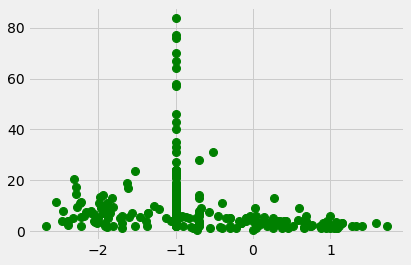

In [9]:
#z = np.polyfit(np.log10(salinity_new), depth_new, 5)
#p = np.poly1d(z)
# are any data in depth_new nan? or salinity_new  = 0
flag1 = salinity_new != 0
flag2 = depth_new != np.nan

flag_new = flag1 & flag2
depth_new = depth_new[flag_new]
salinity_new = salinity_new[flag_new]

# calculate linear fit to all data points
z = np.polyfit(np.log10(salinity_new), depth_new, 1)
p = np.poly1d(z)    

plt.plot(np.log10(salinity_new),depth_new,'g.',markersize = 16, label = 'markus MOSAIC data')